# It seems like a few in every 100 systems that I run with the grid, just completely ignore the grid instruction !?!?!


In [1]:
import numpy as np
import os 
import sys
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

# add run_data path to sys
sys.path.append('./run_data')
from definitions import sim_flags_dict

home_dir = os.path.expanduser("~") 
compas_v = "v02.46.01/"#v02.35.02/"
datar_root =  f"{home_dir}/ceph/CompasOutput/{compas_v}/"


## Read the potential DCO data 
this table includes all systems that become a DCO at any Z (i.e. more info than just the DCO data)

### and subdivide by DCO flavour


In [ ]:
    
def get_merging_dcos(sim_name =  'NewWinds_RemFryer2012', prog_table_name = 'potential_DCO_progenitors_Allinfo.h5'):
    """Read in the potential DCO progenitor table and return the tables for BBH, BHNS and NSNS mergers

    Args:
        sim_name (str, optional): which simulation to load Default 'NewWinds_RemFryer2012'.
        prog_table_name (str, optional): 'potential_DCO_progenitors_Allinfo.h5'.

    Returns:
        BBH_progenitors, BHNS_progenitors, NSNS_progenitors: pandas tables containing the progenitors of BBH, BHNS and NSNS mergers
    """
    ####################################
    # Take the base potential DCO progenitor table
    if os.path.isfile(datar_root+ f'/{sim_name}/'+prog_table_name):
        potential_DCO_progenitors = pd.read_hdf(datar_root + f'{sim_name}/' + prog_table_name, key='All_DCO')
        print('Table exists, reading in... ' ) #potential_DCO_progenitors.info()
    else:
        print('error, table doesnt exist, you should make it using "DataManipulation.ipynb" first')

    potential_DCO_progenitors.reset_index(drop=True, inplace=True)

    # Also make tables that contain only the actual BBH, BHNS and NSNS mergers
    def DCO_merger_bool(table, flavor = 'BBH'):
        """return the DCO merger bool for a given flavor

        Args:
            pandas table: containing all potential DCOs (incl. things that don't become DCO at specific Z)
            flavor (str, optional): BBH, BHNS, or NSNS 
        """
        BBH_bool = np.logical_and(table['Stellar_Type(1)'] == 14,table['Stellar_Type(2)'] == 14)
        BHNS_bool = np.logical_or(np.logical_and(table['Stellar_Type(1)'] == 13,table['Stellar_Type(2)'] == 14),
                                np.logical_and(table['Stellar_Type(1)'] == 14,table['Stellar_Type(2)'] == 13) )
        NSNS_bool = np.logical_and(table['Stellar_Type(1)'] == 13,table['Stellar_Type(2)'] == 13)
        if flavor == 'BBH':
            return np.logical_and(BBH_bool,table['Merges_Hubble_Time'] == True)
        elif flavor == 'BHNS':  
            return np.logical_and(BHNS_bool,table['Merges_Hubble_Time'] == True)
        elif flavor == 'NSNS':
            return np.logical_and(NSNS_bool,table['Merges_Hubble_Time'] == True)

    # make the tables for every flavour
    merging_BBH_bool  = DCO_merger_bool(potential_DCO_progenitors, flavor = 'BBH')
    BBH_progenitors  = potential_DCO_progenitors[merging_BBH_bool]

    merging_BHNS_bool  = DCO_merger_bool(potential_DCO_progenitors, flavor = 'BHNS')
    BHNS_progenitors = potential_DCO_progenitors[merging_BHNS_bool]

    merging_NSNS_bool  = DCO_merger_bool(potential_DCO_progenitors, flavor = 'NSNS')
    NSNS_progenitors = potential_DCO_progenitors[merging_NSNS_bool]

    return [BBH_progenitors, BHNS_progenitors, NSNS_progenitors]





In [2]:
## CHECKING GRID FIlE NOTE: CREATES A LOT OF OUTPUT IN NOTEBOOK (don't git sync!)

# Checking the min and max values of the initial mass

# import re
# masses1 = []
# with open('run_data/BSE_grid_mass_sep_kick.txt', 'r') as f:
#     for line in f:
#         match = re.search(r'--initial-mass-1 (\d+\.\d+)', line)
#         if match:
#             masses1.append(float(match.group(1)))
# print(masses1)
# print(min(masses1), max(masses1))
# 

# Checking the min and max values of the initial mass

# import re
# masses1 = []
# with open('run_data/BSE_grid_mass_sep_kick.txt', 'r') as f:
#     for line in f:
#         match = re.search(r'--initial-mass-1 (\d+\.\d+)', line)
#         if match:
#             masses1.append(float(match.group(1)))
# print(masses1)
# print(min(masses1), max(masses1))
# 

In [3]:
import pandas

# NewWinds_RemFryer2012
h5_data = h5.File(f'{datar_root}/OldWinds_RemFryer2012/logZ-1.52/COMPAS_Output.h5', 'r')
# h5_data = h5.File(f'{home_dir}/ceph/CompasOutput/v03.01.02/NewWinds_RemFryer2012/logZ-4.0/batch_79/COMPAS_Output/COMPAS_Output.h5', 'r')

print(h5_data['BSE_System_Parameters'].keys())

m1 = h5_data['BSE_System_Parameters']['Mass@ZAMS(1)'][()]
print(min(m1), max(m1) )



m2 = h5_data['BSE_System_Parameters']['Mass@ZAMS(2)'][()]
print(min(m2), max(m2) )

run_details = h5_data['Run_Details']

# --random-seed 0 --initial-mass-1 6.339622373744429 --initial-mass-2 4.664862002817223 --semi-major-axis 19.143363410506385 --kick-magnitude-random-1 0.3489500342670595 --kick-phi-1 1.6863737455912653 --kick-theta-1 1.7113103925707782 --kick-mean-anomaly-1 0.4193232442378341 --kick-magnitude-random-2 0.14744499940366373 --kick-phi-2 2.2559523686889227 --kick-theta-2 0.2094033075619413 --kick-mean-anomaly-2 2.616134696056703

# Read the HDF5 datasets as pandas dataframes
SYS = pd.DataFrame()
# chosen to allow for rerunning of systems and other interesting parameters
sys_keys = ['SEED', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'SemiMajorAxis@ZAMS', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Phi(1)', 'SN_Kick_Theta(1)', 'SN_Kick_Mean_Anomaly(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SN_Kick_Phi(2)', 'SN_Kick_Theta(2)', 'SN_Kick_Mean_Anomaly(2)']

for key in sys_keys:
    # You cant directly apply the mask to the HDF5 dataset, so you have to read it first
    read_data = h5_data['BSE_System_Parameters'][key][()]
    SYS[key] = read_data


problematic_seeds = SYS['SEED'][SYS['Mass@ZAMS(1)']< 5. ]
print(len(problematic_seeds) )
print(np.sort(problematic_seeds) )

display(SYS[SYS['SEED'] == 11] )

# --random-seed 0 --initial-mass-1 6.339622373744429 --initial-mass-2 4.664862002817223 --semi-major-axis 19.143363410506385 --kick-magnitude-random-1 0.3489500342670595 --kick-phi-1 1.6863737455912653 --kick-theta-1 1.7113103925707782 --kick-mean-anomaly-1 0.4193232442378341 --kick-magnitude-random-2 0.14744499940366373 --kick-phi-2 2.2559523686889227 --kick-theta-2 0.2094033075619413 --kick-mean-anomaly-2 2.616134696056703


<KeysViewHDF5 ['Applied_Kick_Magnitude(1)', 'Applied_Kick_Magnitude(2)', 'CE_Alpha', 'CE_Event_Counter', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Drawn_Kick_Magnitude(1)', 'Drawn_Kick_Magnitude(2)', 'Eccentricity@ZAMS', 'Equilibrated_At_Birth', 'Error', 'Evolution_Status', 'Immediate_RLOF>CE', 'LBV_Factor', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega@ZAMS(1)', 'Omega@ZAMS(2)', 'Optimistic_CE', 'Record_Type', 'SEED', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SN_Kick_Mean_Anomaly(1)', 'SN_Kick_Mean_Anomaly(2)', 'SN_Kick_Phi(1)', 'SN_Kick_Phi(2)', 'SN_Kick_Theta(1)', 'SN_Kick_Theta(2)', 'SemiMajorAxis@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'SystemicSpeed', 'Unbound', 'WR_Factor']>
2.5695858942213294 149.97943259134644
0.10000646940162342 148.48299503722262
28679

,SEED,Mass@ZAMS(1),Mass@ZAMS(2),SemiMajorAxis@ZAMS,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Phi(1),SN_Kick_Theta(1),SN_Kick_Mean_Anomaly(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Phi(2),SN_Kick_Theta(2),SN_Kick_Mean_Anomaly(2)
900011,11,9.206945,2.672216,0.567021,0.246313,4.150651,1.215015,3.432085,0.567668,4.551316,1.659859,1.585601


In [4]:
import pandas

# NewWinds_RemFryer2012
h5_data = h5.File(f'{datar_root}/OldWinds_RemFryer2012/logZ-4.0/COMPAS_Output.h5', 'r')
# h5_data = h5.File(f'{home_dir}/ceph/CompasOutput/v03.01.02/NewWinds_RemFryer2012/logZ-4.0/batch_79/COMPAS_Output/COMPAS_Output.h5', 'r')

print(h5_data['BSE_System_Parameters'].keys())

m1 = h5_data['BSE_System_Parameters']['Mass@ZAMS(1)'][()]
print(min(m1), max(m1) )

m2 = h5_data['BSE_System_Parameters']['Mass@ZAMS(2)'][()]
print(min(m2), max(m2) )

run_details = h5_data['Run_Details']

# --random-seed 0 --initial-mass-1 6.339622373744429 --initial-mass-2 4.664862002817223 --semi-major-axis 19.143363410506385 --kick-magnitude-random-1 0.3489500342670595 --kick-phi-1 1.6863737455912653 --kick-theta-1 1.7113103925707782 --kick-mean-anomaly-1 0.4193232442378341 --kick-magnitude-random-2 0.14744499940366373 --kick-phi-2 2.2559523686889227 --kick-theta-2 0.2094033075619413 --kick-mean-anomaly-2 2.616134696056703

# Read the HDF5 datasets as pandas dataframes
SYS = pd.DataFrame()
# chosen to allow for rerunning of systems and other interesting parameters
sys_keys = ['SEED', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'SemiMajorAxis@ZAMS', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Phi(1)', 'SN_Kick_Theta(1)', 'SN_Kick_Mean_Anomaly(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SN_Kick_Phi(2)', 'SN_Kick_Theta(2)', 'SN_Kick_Mean_Anomaly(2)']

for key in sys_keys:
    # You cant directly apply the mask to the HDF5 dataset, so you have to read it first
    read_data = h5_data['BSE_System_Parameters'][key][()]
    SYS[key] = read_data


problematic_seeds = SYS['SEED'][SYS['Mass@ZAMS(1)']< 5. ]
print(len(problematic_seeds) )
print(np.sort(problematic_seeds) )

display(SYS[SYS['SEED'] == 89] )

# --random-seed 0 --initial-mass-1 6.339622373744429 --initial-mass-2 4.664862002817223 --semi-major-axis 19.143363410506385 --kick-magnitude-random-1 0.3489500342670595 --kick-phi-1 1.6863737455912653 --kick-theta-1 1.7113103925707782 --kick-mean-anomaly-1 0.4193232442378341 --kick-magnitude-random-2 0.14744499940366373 --kick-phi-2 2.2559523686889227 --kick-theta-2 0.2094033075619413 --kick-mean-anomaly-2 2.616134696056703


<KeysViewHDF5 ['Applied_Kick_Magnitude(1)', 'Applied_Kick_Magnitude(2)', 'CE_Alpha', 'CE_Event_Counter', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Drawn_Kick_Magnitude(1)', 'Drawn_Kick_Magnitude(2)', 'Eccentricity@ZAMS', 'Equilibrated_At_Birth', 'Error', 'Evolution_Status', 'Immediate_RLOF>CE', 'LBV_Factor', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega@ZAMS(1)', 'Omega@ZAMS(2)', 'Optimistic_CE', 'Record_Type', 'SEED', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SN_Kick_Mean_Anomaly(1)', 'SN_Kick_Mean_Anomaly(2)', 'SN_Kick_Phi(1)', 'SN_Kick_Phi(2)', 'SN_Kick_Theta(1)', 'SN_Kick_Theta(2)', 'SemiMajorAxis@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'SystemicSpeed', 'Unbound', 'WR_Factor']>
2.582946286509198 149.97943259134644
0.10000646940162342 148.48299503722262
14856


,SEED,Mass@ZAMS(1),Mass@ZAMS(2),SemiMajorAxis@ZAMS,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Phi(1),SN_Kick_Theta(1),SN_Kick_Mean_Anomaly(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Phi(2),SN_Kick_Theta(2),SN_Kick_Mean_Anomaly(2)
900089,89,4.584766,4.584766,0.016417,0.641956,6.010346,2.608104,4.412026,0.162373,4.374451,2.440541,3.504661


In [5]:
run_details.keys()


grid_keys = ['grid', 'grid-Derivation', 'grid-lines-to-process', 'grid-lines-to-process-Derivation', 'grid-start-line', 'grid-start-line-Derivation']
for key in grid_keys:
    print(run_details[key][()])



[b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_kick.txt'"
 b"'/mnt/home/lvanson/ceph/CompasOutput/v02.46.01/OldWinds_RemFryer2012/BSE_grid_mass_sep_k

,SEED,Mass@ZAMS(1),Mass@ZAMS(2),SemiMajorAxis@ZAMS,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Phi(1),SN_Kick_Theta(1),SN_Kick_Mean_Anomaly(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Phi(2),SN_Kick_Theta(2),SN_Kick_Mean_Anomaly(2)
0,900000,5.010389,0.145423,0.785201,0.919227,2.887009,0.644848,2.964127,0.759735,3.276615,1.148524,3.891084
1,900001,5.457398,4.227925,0.078015,0.748574,6.276804,1.459578,1.820269,0.702945,5.941694,2.866523,0.747708
2,900002,84.497915,9.781453,8.994675,0.328929,3.584261,0.984828,1.702069,0.786651,2.289247,2.178157,5.369956
3,900003,6.238068,6.097866,38.449857,0.001084,4.276088,2.150123,2.398577,0.705318,1.698578,0.453856,5.460980
4,900004,6.799026,6.275186,18.245649,0.942515,3.050036,2.143425,0.587611,0.324511,4.067270,0.648746,1.467281
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,824995,7.400773,5.776794,0.072194,0.439415,1.733653,1.960378,5.187659,0.515726,3.017013,1.369478,4.099182
999996,824996,16.841010,9.404920,1.377289,0.544333,4.810567,2.505330,3.130468,0.257015,3.912487,1.596579,2.247902
999997,824997,7.445875,6.926761,3.658874,0.074497,1.973657,1.564929,1.557826,0.732510,3.897798,1.990507,1.603770
999998,824998,12.583879,8.716210,6.117774,0.197567,1.673324,1.146233,2.200217,0.412955,3.986069,1.597859,3.856711


(array([ 91372., 394338., 170928.,  92509.,  57406.,  38383.,  27309.,
         20408.]),
 array([ 2.5   ,  5.3125,  8.125 , 10.9375, 13.75  , 16.5625, 19.375 ,
        22.1875, 25.    ]),
 <BarContainer object of 8 artists>)

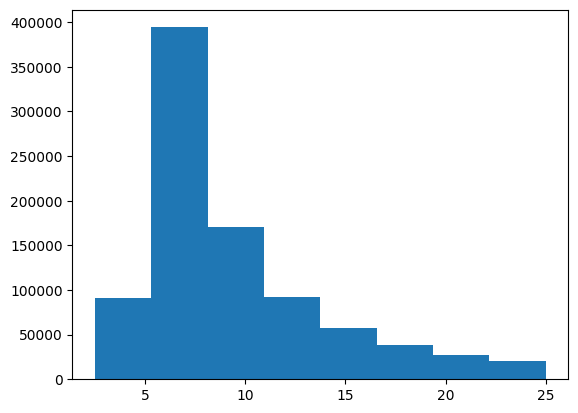

In [6]:
display(SYS)

plt.hist(SYS['Mass@ZAMS(1)'] , bins = np.linspace(2.5, 25, 9))

In [10]:
h5_data = h5.File(f'{datar_root}/NewWinds_RemFryer2012/COMPAS_Output_combinedZ.h5', 'r')

print(h5_data['BSE_System_Parameters'].keys())

m1 = h5_data['BSE_System_Parameters']['Mass@ZAMS(1)'][()]
print('!!!!!! ', min(m1), max(m1) )

m2 = h5_data['BSE_System_Parameters']['Mass@ZAMS(2)'][()]
print(min(m2), max(m2) )

run_details = h5_data['Run_Details']


# initial_mass_keys = ['initial-mass', 'initial-mass-1', 'initial-mass-1-Derivation', 'initial-mass-2', 'initial-mass-2-Derivation', 'initial-mass-Derivation', 'initial-mass-function', 'initial-mass-function-Derivation', 'initial-mass-max', 'initial-mass-max-Derivation', 'initial-mass-min', 'initial-mass-min-Derivation', 'initial-mass-power', 'initial-mass-power-Derivation']
initial_mass_keys = ['initial-mass', 'initial-mass-1',  'initial-mass-2', 'initial-mass-function', 'initial-mass-max',  'initial-mass-min']

for key in initial_mass_keys:
    print(key, run_details[key][0])



<KeysViewHDF5 ['Applied_Kick_Magnitude(1)', 'Applied_Kick_Magnitude(2)', 'CE_Alpha', 'CE_Event_Counter', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Drawn_Kick_Magnitude(1)', 'Drawn_Kick_Magnitude(2)', 'Eccentricity@ZAMS', 'Equilibrated_At_Birth', 'Error', 'Evolution_Status', 'Immediate_RLOF>CE', 'LBV_Factor', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega@ZAMS(1)', 'Omega@ZAMS(2)', 'Optimistic_CE', 'Record_Type', 'SEED', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SN_Kick_Mean_Anomaly(1)', 'SN_Kick_Mean_Anomaly(2)', 'SN_Kick_Phi(1)', 'SN_Kick_Phi(2)', 'SN_Kick_Theta(1)', 'SN_Kick_Theta(2)', 'SemiMajorAxis@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'SystemicSpeed', 'Unbound', 'WR_Factor']>
!!!!!!  2.5695858942213294 149.97943259134644
0.10000646940162342 148.482995037222